# Mod 10 CS II

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
"""1.Open and display the image “dog.jpeg”. Convert the image in to numpy array, so that it can be used in further processing.
[Hint: Use PIL module from python]"""

from PIL import Image
img= Image.open("../demo/dogs.jpeg")

In [3]:
print(f"Dimensions of Image: \nHeight: {str(img.height)} \nWidth: {str(img.width)}")

Dimensions of Image: 
Height: 185 
Width: 272


In [4]:
#Converting the img to the numpy array
np_array = np.array(img)
np_array

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[252, 248, 249],
        [254, 250, 251],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 245, 246],
        [250, 248, 249],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [244, 244, 244]],

       [[253, 251, 254],
        [253, 251, 254],
        [253, 251, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [5]:
print(f"Array shape: {np_array.shape}")

Array shape: (185, 272, 3)


In [6]:
#Reshaping the array in 2 Dim
flat_array = np_array.ravel()
new_array = flat_array.reshape( np_array.shape[0] * np_array.shape[1], np_array.shape[2])

In [7]:
new_array.shape

(50320, 3)

In [8]:
#Initializing the KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_array)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
print(f"Cluster Centres: {kmeans.cluster_centers_}")

Cluster Centres: [[210.72921266 174.96263593 143.86460633]
 [ 29.53151823  21.59559346  20.4844459 ]
 [251.51161734 247.74204465 243.25012628]]


In [10]:
#Elements of each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_unq = dict(zip(unique, counts))
print(f"Elements of each cluster: {dict_unq}")

Elements of each cluster: {0: 12228, 1: 18293, 2: 19799}


In [11]:
#plot the clusters
new_df = pd.DataFrame(new_array, columns =["col1", "col2", "col3"])

new_df["cluster"] = kmeans.labels_
sns.lmplot("col1", "col2", data=new_df, hue="cluster", palette="coolwarm", fit_reg=False)


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


In [12]:
new_df.head()

,col1,col2,col3,cluster
0,240,240,240,2
1,255,255,255,2
2,255,255,255,2
3,251,251,251,2
4,255,255,255,2


In [13]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed =  np.clip(X_compressed.astype('uint8'), 0 , 255)
X_compressed = X_compressed.reshape(np_array.shape[0] , np_array.shape[1], np_array.shape[2])

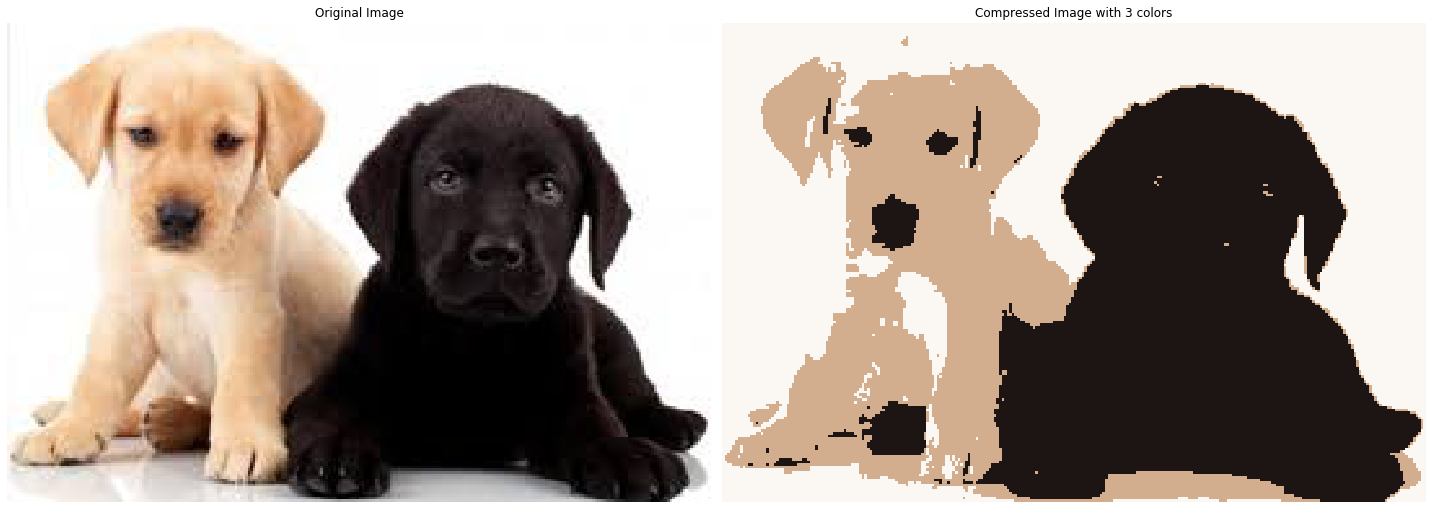

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

In [15]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

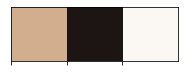

In [16]:
# Find Dominant colors 
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()